In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("shantanudhakadd/bank-customer-churn-prediction")

print("Path to dataset files:", path)

Path to dataset files: /root/.cache/kagglehub/datasets/shantanudhakadd/bank-customer-churn-prediction/versions/1


In [3]:
import os

dataset_dir = '/root/.cache/kagglehub/datasets/shantanudhakadd/bank-customer-churn-prediction/versions/1'

print("Files in dataset directory:", os.listdir(dataset_dir))

file_path = os.path.join(dataset_dir, 'Churn_Modelling.csv')
df = pd.read_csv(file_path)

Files in dataset directory: ['Churn_Modelling.csv']


In [4]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [5]:
df.duplicated().sum()

0

In [6]:
df.isnull().sum()

,0
RowNumber,0
CustomerId,0
Surname,0
CreditScore,0
Geography,0
Gender,0
Age,0
Tenure,0
Balance,0
NumOfProducts,0


In [7]:
df['Gender'] = (df['Gender'] == 'Male').astype('int')

In [8]:
df.head().T

,0,1,2,3,4
RowNumber,1,2,3,4,5
CustomerId,15634602,15647311,15619304,15701354,15737888
Surname,Hargrave,Hill,Onio,Boni,Mitchell
CreditScore,619,608,502,699,850
Geography,France,Spain,France,France,Spain
Gender,0,0,0,0,0
Age,42,41,42,39,43
Tenure,2,1,8,1,2
Balance,0.0,83807.86,159660.8,0.0,125510.82
NumOfProducts,1,1,3,2,1


In [9]:
from sklearn.metrics import mutual_info_score

In [10]:
def mutual_info_churn_score(series):
  return mutual_info_score(series, df['Exited'])

In [11]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

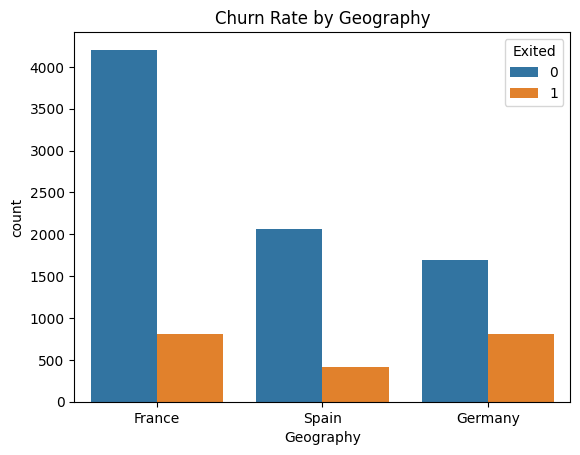

In [12]:
sns.countplot(data=df, x='Geography', hue='Exited')
plt.title('Churn Rate by Geography')
plt.show()

In [13]:
X = df.drop(columns=['Exited', 'Surname', 'CustomerId'])
y = df['Exited']

In [14]:
X.head()

,RowNumber,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,1,619,France,0,42,2,0.00,1,1,1,101348.88
1,2,608,Spain,0,41,1,83807.86,1,0,1,112542.58
2,3,502,France,0,42,8,159660.80,3,1,0,113931.57
3,4,699,France,0,39,1,0.00,2,0,0,93826.63
4,5,850,Spain,0,43,2,125510.82,1,1,1,79084.10


In [15]:
X['Geography'] = df['Geography'].map({'France': 0, 'Germany': 1, 'Spain': 2})
X.head().T

,0,1,2,3,4
RowNumber,1.00,2.00,3.00,4.00,5.00
CreditScore,619.00,608.00,502.00,699.00,850.00
Geography,0.00,2.00,0.00,0.00,2.00
Gender,0.00,0.00,0.00,0.00,0.00
Age,42.00,41.00,42.00,39.00,43.00
Tenure,2.00,1.00,8.00,1.00,2.00
Balance,0.00,83807.86,159660.80,0.00,125510.82
NumOfProducts,1.00,1.00,3.00,2.00,1.00
HasCrCard,1.00,0.00,1.00,0.00,1.00
IsActiveMember,1.00,1.00,0.00,0.00,1.00


In [16]:
X.dtypes

,0
RowNumber,int64
CreditScore,int64
Geography,int64
Gender,int64
Age,int64
Tenure,int64
Balance,float64
NumOfProducts,int64
HasCrCard,int64
IsActiveMember,int64


In [17]:
X.isna().sum()

,0
RowNumber,0
CreditScore,0
Geography,0
Gender,0
Age,0
Tenure,0
Balance,0
NumOfProducts,0
HasCrCard,0
IsActiveMember,0


In [18]:
X.Geography.nunique()

3

In [19]:
X.Geography.value_counts()

,count
Geography,
0,5014
1,2509
2,2477


In [20]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

In [21]:
len(X_train), len(X_test)

(8000, 2000)

In [22]:
model = LogisticRegression()

In [23]:
model.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [24]:
y_pred = model.predict(X_test)

In [25]:
classification_report(y_test, y_pred)

'              precision    recall  f1-score   support\n\n           0       0.81      0.98      0.89      1607\n           1       0.46      0.08      0.14       393\n\n    accuracy                           0.80      2000\n   macro avg       0.64      0.53      0.51      2000\nweighted avg       0.74      0.80      0.74      2000\n'

In [26]:
accuracy_score(y_test, y_pred)

0.8005